In [1]:
Sys.setlocale("LC_ALL", 'Persian')

Warning message in Sys.setlocale("LC_ALL", "Persian"):
"using locale code page other than 65001 ("UTF-8") may cause problems"


[1] "LC_COLLATE=Persian_Iran.1256;LC_CTYPE=Persian_Iran.1256;LC_MONETARY=Persian_Iran.1256;LC_NUMERIC=C;LC_TIME=Persian_Iran.1256"

In [2]:
options(scipen=999)

In [3]:
library(plyr)
library(caret)
library(class)
library(forecast)
library(KernelKnn)
library(kknn)

Loading required package: ggplot2

Loading required package: lattice

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Warning message:
"package 'KernelKnn' was built under R version 4.3.2"
Warning message:
"package 'kknn' was built under R version 4.3.2"

Attaching package: 'kknn'


The following object is masked from 'package:caret':

    contr.dummy




In [4]:
data = readxl::read_excel('D:\\project\\Visualization-and-Data-Analyzing-1-master\\Decision Tree\\Iran_Maskan_koll.xlsx')

In [5]:
head(data)

کد قرارداد,نوع قرارداد,استان,شهرستان,نوع ملک,منطقه شهرداری,نوع کاربری,مساحت,درصد,قیمت,قیمت یک مترمربع,عمر بنا,نوع اسکلت,تاریخ ثبت قرارداد,شش رقم نخست کد پستی
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>
19136381,مبايعه نامه,زنجان,ابهر,دستگاه آپارتمان,NA,مسکوني,83.00,100,3000000,36144.58,15,فلزي,1399/04/14,456179
19140513,مبايعه نامه,زنجان,ابهر,دستگاه آپارتمان,NA,مسکوني,90.00,100,1080000,12000.00,9,فلزي,1399/04/15,456615
19192568,مبايعه نامه,زنجان,ابهر,دستگاه آپارتمان,NA,مسکوني,49.00,100,10000000,204081.63,10,بتوني,1399/04/23,456173
19202902,مبايعه نامه,زنجان,ابهر,دستگاه آپارتمان,NA,مسکوني,80.92,100,3240000,40039.55,9,فلزي,1399/04/24,456194
19203171,مبايعه نامه,زنجان,ابهر,دستگاه آپارتمان,NA,مسکوني,80.00,100,750000,9375.00,10,بتوني,1399/04/24,456618
19052240,مبايعه نامه,مرکزي,اراك,دستگاه آپارتمان,NA,مسکوني,100.00,100,5500000,55000.00,0,بتوني,1399/04/01,381333


In [6]:
str(data)

tibble [43,133 x 15] (S3: tbl_df/tbl/data.frame)
 $ کد قرارداد         : chr [1:43133] "19136381" "19140513" "19192568" "19202902" ...
 $ نوع قرارداد        : chr [1:43133] "مبايعه نامه" "مبايعه نامه" "مبايعه نامه" "مبايعه نامه" ...
 $ استان              : chr [1:43133] "زنجان" "زنجان" "زنجان" "زنجان" ...
 $ شهرستان            : chr [1:43133] "ابهر" "ابهر" "ابهر" "ابهر" ...
 $ نوع ملک            : chr [1:43133] "دستگاه آپارتمان" "دستگاه آپارتمان" "دستگاه آپارتمان" "دستگاه آپارتمان" ...
 $ منطقه شهرداري      : num [1:43133] NA NA NA NA NA NA NA NA NA 4 ...
 $ نوع کاربري         : chr [1:43133] "مسکوني" "مسکوني" "مسکوني" "مسکوني" ...
 $ مساحت              : num [1:43133] 83 90 49 80.9 80 ...
 $ درصد               : chr [1:43133] "100" "100" "100" "100" ...
 $ قيمت               : num [1:43133] 3000000 1080000 10000000 3240000 750000 ...
 $ قيمت يک مترمربع    : chr [1:43133] "36144.58" "12000.00" "204081.63" "40039.55" ...
 $ عمر بنا            : num [1:43133] 15 9 10 9 10 0 1 6 19 0 ...


In [7]:
dim(data)

[1] 43133    15

In [8]:
names(data)[1] = 'contrat_number'
names(data)[2] = 'contract_type'
names(data)[3] = 'state'
names(data)[4] = 'city'
names(data)[5] = 'property_type'
names(data)[6] = 'district_number'
names(data)[7] = 'usage_type'
names(data)[8] = 'area'
names(data)[9] = 'percentage'
names(data)[10] = 'price'
names(data)[11] = 'price_per_square'
names(data)[12] = 'building_age'
names(data)[13] = 'skeleton_type'
names(data)[14] = 'contract_date'
names(data)[15] = 'postal_code'

data = data[!is.na(data$contrat_number),]
data$percentage = as.numeric(data$percentage)
data$price = as.numeric(data$price) / 1000
data$price_per_square = as.numeric(data$price_per_square) / 10000

In [9]:
khoozestan = data[data$state == 'خوزستان',]

head(khoozestan)

contrat_number,contract_type,state,city,property_type,district_number,usage_type,area,percentage,price,price_per_square,building_age,skeleton_type,contract_date,postal_code
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
19048971,مبايعه نامه,خوزستان,اهواز,دستگاه آپارتمان,NA,مسکوني,75.00,100,1950,2.600000,2,بدون اسکلت,1399/04/01,617563
19052727,مبايعه نامه,خوزستان,اهواز,دستگاه آپارتمان,2,مسکوني,96.30,100,7350,7.632399,13,فلزي,1399/04/01,191181
19056655,مبايعه نامه,خوزستان,اهواز,دستگاه آپارتمان,8,مسکوني,111.60,100,5850,5.241935,8,بتوني,1399/04/02,618493
19060434,مبايعه نامه,خوزستان,اهواز,دستگاه آپارتمان,4,مسکوني,13313.00,100,4000,0.030046,11,فلزي,1399/04/02,613668
19061836,مبايعه نامه,خوزستان,اهواز,دستگاه آپارتمان,5,مسکوني,80.48,100,2850,3.541252,11,بتوني و فلزي,1399/04/02,613495
19061854,مبايعه نامه,خوزستان,اهواز,دستگاه آپارتمان,3,مسکوني,72.22,100,5000,6.923290,9,بتوني و فلزي,1399/04/02,617763


In [10]:
summary(khoozestan)

 contrat_number     contract_type         state               city          
 Length:768         Length:768         Length:768         Length:768        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
 property_type      district_number   usage_type             area         
 Length:768         Min.   : 1.000   Length:768         Min.   :    1.00  
 Class :character   1st Qu.: 2.000   Class :character   1st Qu.:   76.15  
 Mode  :character   Median : 2.000   Mode  :character   Median :   90.00  
                    Mean   : 2.492                      Mean   :  323.55  
         

In [11]:
khoozestan = khoozestan[-c(1,2,3,5,6,7,9,11,14)]

In [12]:
head(khoozestan)

city,area,price,building_age,skeleton_type,postal_code
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
اهواز,75.00,1950,2,بدون اسکلت,617563
اهواز,96.30,7350,13,فلزي,191181
اهواز,111.60,5850,8,بتوني,618493
اهواز,13313.00,4000,11,فلزي,613668
اهواز,80.48,2850,11,بتوني و فلزي,613495
اهواز,72.22,5000,9,بتوني و فلزي,617763


In [13]:
cities_before_mapping <- unique(khoozestan$city)
cities_after_mapping <- c(c('ahvaz','izeh','abadan','bandare_emam_khomeini','bandare_mahshahr','behbahan','chamran',
               'khorramshahr','dezfool','raamshir','shoosh','shooshtar','shiban','masjed_soleiman','handijan'))

metals_before_mapping <- unique(khoozestan$skeleton_type)
metals_after_mapping <- c('none','metal','concrete','metal_concrete','brick_or_cement_block','adobe_or_clay')


khoozestan$city = mapvalues(khoozestan$city, from = cities_before_mapping, to = cities_after_mapping )

khoozestan$skeleton_type = mapvalues(khoozestan$skeleton_type, from= metals_before_mapping, to = metals_after_mapping)


head(khoozestan)

city,area,price,building_age,skeleton_type,postal_code
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
ahvaz,75.00,1950,2,none,617563
ahvaz,96.30,7350,13,metal,191181
ahvaz,111.60,5850,8,concrete,618493
ahvaz,13313.00,4000,11,metal,613668
ahvaz,80.48,2850,11,metal_concrete,613495
ahvaz,72.22,5000,9,metal_concrete,617763


In [17]:
library('psych')

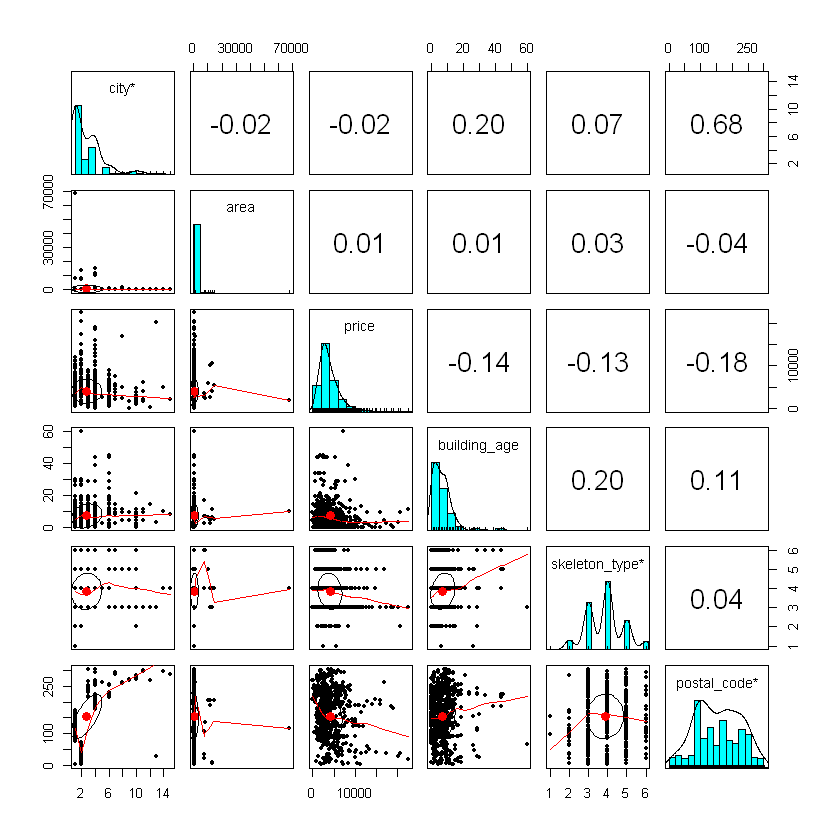

In [18]:
pairs.panels(khoozestan)

In [19]:
library(psych)

In [20]:
dummy_khoozestan = data.frame(predict(dummyVars(~.,khoozestan),khoozestan))

str(dummy_khoozestan)

'data.frame':	768 obs. of  327 variables:
 $ cityabadan                        : num  0 0 0 0 0 0 0 0 0 0 ...
 $ cityahvaz                         : num  1 1 1 1 1 1 1 1 1 1 ...
 $ citybandare_emam_khomeini         : num  0 0 0 0 0 0 0 0 0 0 ...
 $ citybandare_mahshahr              : num  0 0 0 0 0 0 0 0 0 0 ...
 $ citybehbahan                      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ citychamran                       : num  0 0 0 0 0 0 0 0 0 0 ...
 $ citydezfool                       : num  0 0 0 0 0 0 0 0 0 0 ...
 $ cityhandijan                      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ cityizeh                          : num  0 0 0 0 0 0 0 0 0 0 ...
 $ citykhorramshahr                  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ citymasjed_soleiman               : num  0 0 0 0 0 0 0 0 0 0 ...
 $ cityraamshir                      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ cityshiban                        : num  0 0 0 0 0 0 0 0 0 0 ...
 $ cityshoosh                        : num  0 0 0 0 0 0 0 0 0 0 ...
 $ cit

In [24]:
normalize <- function(x){
                    return ((x-min(x))/(max(x)-(min(x))))
            }

In [21]:
X = dummy_khoozestan[-c(17)]
Y = dummy_khoozestan['price']

In [22]:
set.seed(313)

In [25]:
train_index = sample.int(nrow(dummy_khoozestan),0.8*nrow(dummy_khoozestan),replace=F)

X = as.data.frame(lapply(dummy_khoozestan[,-c(17)],normalize))
Y = dummy_khoozestan['price']

x_train = X[train_index,]
y_train = Y[train_index,]
train = cbind(x_train,y_train)

x_test = X[-train_index,]
y_test = Y[-train_index,]
test = cbind(x_test,y_test)

In [26]:
nrow(Y) == nrow(X)

[1] TRUE

In [27]:
summary(x_train)

   cityabadan       cityahvaz      citybandare_emam_khomeini
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000           
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000           
 Median :0.0000   Median :0.0000   Median :0.0000           
 Mean   :0.4593   Mean   :0.1124   Mean   :0.1107           
 3rd Qu.:1.0000   3rd Qu.:0.0000   3rd Qu.:0.0000           
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000           
 citybandare_mahshahr  citybehbahan       citychamran       citydezfool      
 Min.   :0.0000       Min.   :0.000000   Min.   :0.00000   Min.   :0.000000  
 1st Qu.:0.0000       1st Qu.:0.000000   1st Qu.:0.00000   1st Qu.:0.000000  
 Median :0.0000       Median :0.000000   Median :0.00000   Median :0.000000  
 Mean   :0.2231       Mean   :0.001629   Mean   :0.05212   Mean   :0.004886  
 3rd Qu.:0.0000       3rd Qu.:0.000000   3rd Qu.:0.00000   3rd Qu.:0.000000  
 Max.   :1.0000       Max.   :1.000000   Max.   :1.00000   Max.   :1.000000  
  cityhandijan         city

In [30]:
names(train)

[1] "cityabadan"                         "cityahvaz"                         
  [3] "citybandare_emam_khomeini"          "citybandare_mahshahr"              
  [5] "citybehbahan"                       "citychamran"                       
  [7] "citydezfool"                        "cityhandijan"                      
  [9] "cityizeh"                           "citykhorramshahr"                  
 [11] "citymasjed_soleiman"                "cityraamshir"                      
 [13] "cityshiban"                         "cityshoosh"                        
 [15] "cityshooshtar"                      "area"                              
 [17] "building_age"                       "skeleton_typeadobe_or_clay"        
 [19] "skeleton_typebrick_or_cement_block" "skeleton_typeconcrete"             
 [21] "skeleton_typemetal"                 "skeleton_typemetal_concrete"       
 [23] "skeleton_typenone"                  "postal_code181757"                 
 [25] "postal_code191181"                  "postal_code613373"                 
 [27] "postal_code613388"                  "postal_code613493"                 
 [29] "postal_code613495"                  "postal_code613664"                 
 [31] "postal_code613668"                  "postal_code613669"                 
 [33] "postal_code613674"                  "postal_code613682"                 
 [35] "postal_code613691"                  "postal_code613697"                 
 [37] "postal_code613761"                  "postal_code613783"                 
 [39] "postal_code613858"                  "postal_code613865"                 
 [41] "postal_code613866"                  "postal_code613868"                 
 [43] "postal_code613873"                  "postal_code613877"                 
 [45] "postal_code613881"                  "postal_code613968"                 
 [47] "postal_code613975"                  "postal_code614398"                 
 [49] "postal_code614464"                  "postal_code614497"                 
 [51] "postal_code614498"                  "postal_code614818"                 
 [53] "postal_code615167"                  "postal_code615377"                 
 [55] "postal_code615381"                  "postal_code615458"                 
 [57] "postal_code615468"                  "postal_code615488"                 
 [59] "postal_code615568"                  "postal_code615569"                 
 [61] "postal_code615573"                  "postal_code615574"                 
 [63] "postal_code615583"                  "postal_code615591"                 
 [65] "postal_code615896"                  "postal_code616388"                 
 [67] "postal_code616394"                  "postal_code616395"                 
 [69] "postal_code616396"                  "postal_code616397"                 
 [71] "postal_code616463"                  "postal_code616464"                 
 [73] "postal_code616478"                  "postal_code616488"                 
 [75] "postal_code616571"                  "postal_code616576"                 
 [77] "postal_code617563"                  "postal_code617596"                 
 [79] "postal_code617763"                  "postal_code617781"                 
 [81] "postal_code617797"                  "postal_code618389"                 
 [83] "postal_code618397"                  "postal_code618398"                 
 [85] "postal_code618484"                  "postal_code618491"                 
 [87] "postal_code618493"                  "postal_code618576"                 
 [89] "postal_code618761"                  "postal_code618763"                 
 [91] "postal_code618776"                  "postal_code618783"                 
 [93] "postal_code619587"                  "postal_code619595"                 
 [95] "postal_code619767"                  "postal_code619785"                 
 [97] "postal_code631131"                  "postal_code631158"                 
 [99] "postal_code631316"                  "postal_code631363"                 
[1

In [31]:
prettySeq <- function(x) paste("Resample", gsub(" ", "0", format(seq(along = x))), sep = "")

createRandomDataPartition <- function(y, times, p) {
  vec <- 1:length(y)
  n_samples <- round(p * length(y))
  
  result <- list()
  for(t in 1:times){
    indices <- sample(vec, n_samples, replace = FALSE)
    result[[t]] <- indices
    #names(result)[t] <- paste0("Resample", t)
  }
  names(result) <- prettySeq(result)
  result
}

In [32]:
createRandomDataPartition(y=1:10 , time=5 , p=0.6)

$Resample1
[1]  1  4  7  9 10  6

$Resample2
[1] 10  5  8  9  4  2

$Resample3
[1]  5  4  8  2  7 10

$Resample4
[1] 7 5 3 8 9 6

$Resample5
[1]  6  7  2 10  3  1

In [33]:
set.seed(1234)
n_repeats <- 20
train_fraction <- 0.8

parts <- createRandomDataPartition(1:nrow(train), times = n_repeats, p = train_fraction)

ctrl <- trainControl(method = "repeatedcv",  ## The method doesn't matter
                     index= parts, 
                     savePredictions = TRUE
                     ) 

In [34]:
m1 <- train(y_train ~. ,
            tuneGrid = expand.grid(k=1:30),
            data = train,
            metric = 'MAE',
            method = 'knn',
            trControl = ctrl)

In [35]:
m1

k-Nearest Neighbors 

614 samples
326 predictors

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 1 times) 
Summary of sample sizes: 491, 491, 491, 491, 491, 491, ... 
Resampling results across tuning parameters:

  k   RMSE      Rsquared   MAE     
   1  3367.069  0.1326148  2104.156
   2  2855.181  0.1823695  1875.462
   3  2673.640  0.2201600  1785.719
   4  2583.965  0.2471691  1731.211
   5  2560.080  0.2533653  1733.273
   6  2566.405  0.2462837  1731.518
   7  2581.467  0.2348630  1742.528
   8  2575.323  0.2378208  1738.041
   9  2597.908  0.2250832  1754.704
  10  2617.267  0.2141966  1770.423
  11  2632.811  0.2046235  1779.958
  12  2642.154  0.1994585  1785.649
  13  2639.990  0.1999891  1786.359
  14  2639.402  0.2007026  1789.013
  15  2655.103  0.1902078  1798.445
  16  2665.518  0.1836588  1804.064
  17  2670.023  0.1804696  1804.063
  18  2676.688  0.1761721  1810.868
  19  2669.326  0.1798160  1808.765
  20  2668.874  0.1805598  1812.059
  21  2666.00

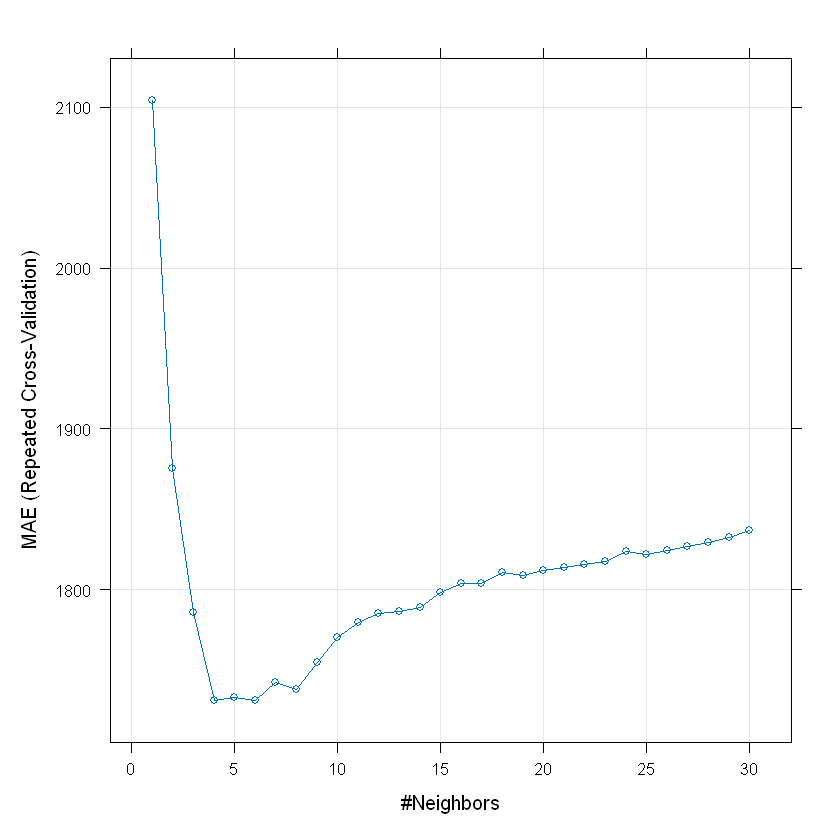

In [36]:
plot(m1)

In [37]:
accuracy(predict(m1,x_test),y_test)

,ME,RMSE,MAE,MPE,MAPE
Test set,-220.2803,2565.841,1588.992,-3584.16,3603.863


In [38]:
accuracy(predict(m1,x_train),y_train)

,ME,RMSE,MAE,MPE,MAPE
Test set,-22.30364,2109.159,1406.975,-499.6895,519.834


In [39]:
weighted_average.knn <- function(x_train,x_test,y_train,k){
    
        df = FNN::knnx.index(data = x_train , query=x_test , k=k)
        values = data.frame(1:nrow(x_test))
        for(var in 1:k)
         {
          values = cbind(values,y_train[df[,var]])
         }
        values = values[-c(1)]
        dist = FNN::knnx.dist(data = x_train , query=x_test , k=k)
        weights = 1/dist
        print(as.data.frame(rowSums(weights)))
        return (rowSums(values * weights)) / as.data.frame(rowSums(weights))

        }
     